In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [82]:
house = pd.read_csv("house.csv", index_col = 0)
house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [83]:
print(house.shape)

(1460, 80)


In [84]:
house.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 80, dtype: object

In [85]:
house.MSSubClass = house.MSSubClass.astype("str")
house.dtypes

MSSubClass        object
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 80, dtype: object

In [86]:
house.isnull().sum().sum()

6965

In [87]:
miss_percent = house.isnull().mean()
miss_percent

MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177397
LotArea          0.000000
Street           0.000000
                   ...   
MoSold           0.000000
YrSold           0.000000
SaleType         0.000000
SaleCondition    0.000000
SalePrice        0.000000
Length: 80, dtype: float64

In [88]:
miss_percent[miss_percent > 0.1]

LotFrontage    0.177397
Alley          0.937671
FireplaceQu    0.472603
PoolQC         0.995205
Fence          0.807534
MiscFeature    0.963014
dtype: float64

In [89]:
drop_cols = list(miss_percent[miss_percent > 0.1].index)
drop_cols

['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [90]:
df_drop_cols = house.drop(drop_cols, axis = 1)
df_drop_cols.shape

(1460, 74)

In [91]:
df_drop_cols.isnull().sum().sum()

609

In [92]:
df_without_na = df_drop_cols.dropna()
df_without_na.shape

(1338, 74)

In [93]:
df_without_na.isnull().sum().sum()

0

In [94]:
df_without_na_dummy = pd.get_dummies(df_without_na, drop_first=True)
df_without_na_dummy.shape

(1338, 240)

In [95]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import r2_score

mdl = LinearRegression()

X = df_without_na_dummy.drop("SalePrice", axis = 1)
y = df_without_na_dummy["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scores = cross_val_score(mdl, X_train, y_train, cv = 10)

mdl.fit(X_train,y_train)
ypred = mdl.predict(X_test)

results = pd.DataFrame([], columns = ["r2 mean", "r2 std", "r2 test"])

results.loc["Without NA"] = [scores.mean(), scores.std(), r2_score(y_test, ypred)]
results

,r2 mean,r2 std,r2 test
Without NA,0.547436,0.574908,0.380075


In [96]:
miss_percent = df_drop_cols.isnull().mean()
miss_percent[miss_percent > 0]

MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
dtype: float64

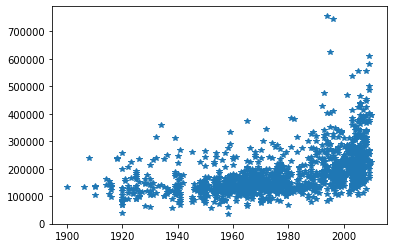

In [97]:
plt.plot(df_drop_cols.GarageYrBlt, df_drop_cols.SalePrice, "*")

In [98]:
df_drop_cols.MasVnrType = df_drop_cols.MasVnrType.fillna("None")
df_drop_cols.MasVnrArea = df_drop_cols.MasVnrArea.fillna(0)
df_drop_cols.BsmtQual = df_drop_cols.BsmtQual.fillna("None")
df_drop_cols.BsmtCond = df_drop_cols.BsmtCond.fillna("None")
df_drop_cols.BsmtExposure = df_drop_cols.BsmtExposure.fillna("None")
df_drop_cols.BsmtFinType1 = df_drop_cols.BsmtFinType1.fillna("None")
df_drop_cols.BsmtFinType2 = df_drop_cols.BsmtFinType2.fillna("None")
df_drop_cols.Electrical = df_drop_cols.Electrical.fillna("None") 
df_drop_cols.GarageType = df_drop_cols.GarageType.fillna("None")
df_drop_cols.GarageYrBlt = df_drop_cols.GarageYrBlt.fillna(0)
df_drop_cols.GarageFinish = df_drop_cols.GarageFinish.fillna("None")
df_drop_cols.GarageQual = df_drop_cols.GarageQual.fillna("None")
df_drop_cols.GarageCond = df_drop_cols.GarageCond.fillna("None")

In [99]:
df_drop_cols.shape

(1460, 74)

In [100]:
df_drop_cols_dummy = pd.get_dummies(df_drop_cols, drop_first=True)
print(df_drop_cols_dummy.shape)

X = df_drop_cols_dummy.drop("SalePrice", axis = 1)
y = df_drop_cols_dummy["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scores = cross_val_score(mdl, X_train, y_train, cv = 10)

mdl.fit(X_train,y_train)
ypred = mdl.predict(X_test)

results.loc["Fill NA"] = [scores.mean(), scores.std(), r2_score(y_test, ypred)]
results

(1460, 255)


,r2 mean,r2 std,r2 test
Without NA,0.547436,0.574908,0.380075
Fill NA,0.588745,0.419368,0.643133


In [101]:
df_drop_cols["LotFrontage"] = house.LotFrontage.fillna(0)
df_drop_cols["Alley"] = house.Alley.fillna("None")
df_drop_cols["FireplaceQu"] = house.FireplaceQu.fillna("None")
df_drop_cols["PoolQC"] = house.PoolQC.fillna("None")
df_drop_cols["Fence"] = house.Fence.fillna("None")
df_drop_cols["MiscFeature"] = house.MiscFeature.fillna("None")
print(df_drop_cols.shape)

(1460, 80)


In [102]:
df_drop_cols_dummy = pd.get_dummies(df_drop_cols, drop_first=True)
print(df_drop_cols_dummy.shape)

X = df_drop_cols_dummy.drop("SalePrice", axis = 1)
y = df_drop_cols_dummy["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scores = cross_val_score(mdl, X_train, y_train, cv = 10)

mdl.fit(X_train,y_train)
ypred = mdl.predict(X_test)

results.loc["Full Data"] = [scores.mean(), scores.std(), r2_score(y_test, ypred)]
results

(1460, 274)


,r2 mean,r2 std,r2 test
Without NA,0.547436,0.574908,0.380075
Fill NA,0.588745,0.419368,0.643133
Full Data,0.123984,0.756375,-0.115897


In [103]:
mdl.score(X_train,y_train)

0.9405889752829465

In [104]:
df_new = df_drop_cols.copy()

In [105]:
df_new.MSSubClass.unique()

array(['60', '20', '70', '50', '190', '45', '90', '120', '30', '85', '80',
       '160', '75', '180', '40'], dtype=object)

In [106]:
df_new.MSSubClass.value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [107]:
category_percent = df_new.MSSubClass.value_counts() / len(df_new)
category_percent

20     0.367123
60     0.204795
50     0.098630
120    0.059589
30     0.047260
160    0.043151
70     0.041096
80     0.039726
90     0.035616
190    0.020548
85     0.013699
75     0.010959
45     0.008219
180    0.006849
40     0.002740
Name: MSSubClass, dtype: float64

In [108]:
category = list(category_percent[category_percent < 0.01].index)
category

['45', '180', '40']

In [109]:
df_new.MSSubClass = df_new.MSSubClass.replace(category, "Other")
df_new.MSSubClass.value_counts() / len(df_new)

20       0.367123
60       0.204795
50       0.098630
120      0.059589
30       0.047260
160      0.043151
70       0.041096
80       0.039726
90       0.035616
190      0.020548
Other    0.017808
85       0.013699
75       0.010959
Name: MSSubClass, dtype: float64

In [110]:
df_new_dummy = pd.get_dummies(df_new, drop_first=True)
print(df_new_dummy.shape)

X = df_new_dummy.drop("SalePrice", axis = 1)
y = df_new_dummy["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scores = cross_val_score(mdl, X_train, y_train, cv = 10)

mdl.fit(X_train,y_train)
ypred = mdl.predict(X_test)

results.loc["MSSubclass Simple"] = [scores.mean(), scores.std(), r2_score(y_test, ypred)]
results

(1460, 272)


,r2 mean,r2 std,r2 test
Without NA,0.547436,0.574908,0.380075
Fill NA,0.588745,0.419368,0.643133
Full Data,0.123984,0.756375,-0.115897
MSSubclass Simple,0.129578,0.752395,-0.110499


In [111]:
category_cols = [col for col in df_new.columns if df_new[col].dtype == "O"]
category_cols

['MSSubClass',
 'MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition',
 'Alley',
 'FireplaceQu',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [112]:
for col in category_cols:
    category_percent = df_new[col].value_counts()/len(df_new)
    category = list(category_percent[category_percent < 0.01].index)
    if len(category) > 1:
        df_new[col] = df_new[col].replace(category, "Other")

In [113]:
df_new_dummy = pd.get_dummies(df_new, drop_first=True)
print(df_new_dummy.shape)

X = df_new_dummy.drop("SalePrice", axis = 1)
y = df_new_dummy["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scores = cross_val_score(mdl, X_train, y_train, cv = 10)

mdl.fit(X_train,y_train)
ypred = mdl.predict(X_test)

results.loc["All Category Simple"] = [scores.mean(), scores.std(), r2_score(y_test, ypred)]
results

(1460, 217)


,r2 mean,r2 std,r2 test
Without NA,0.547436,0.574908,0.380075
Fill NA,0.588745,0.419368,0.643133
Full Data,0.123984,0.756375,-0.115897
MSSubclass Simple,0.129578,0.752395,-0.110499
All Category Simple,0.750350,0.177566,0.869965


In [114]:
df_new.ExterQual.unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [115]:
df_new.ExterQual = df_new.ExterQual.replace({"Fa":1,"TA":2, "Gd": 3, "Ex":4}) 
df_new.ExterQual.unique()

array([3, 2, 4, 1])

In [116]:
df_new_dummy = pd.get_dummies(df_new, drop_first=True)
print(df_new_dummy.shape)

X = df_new_dummy.drop("SalePrice", axis = 1)
y = df_new_dummy["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scores = cross_val_score(mdl, X_train, y_train, cv = 10)

mdl.fit(X_train,y_train)
ypred = mdl.predict(X_test)

results.loc["ExterQual Ordinal"] = [scores.mean(), scores.std(), r2_score(y_test, ypred)]
results

(1460, 215)


,r2 mean,r2 std,r2 test
Without NA,0.547436,0.574908,0.380075
Fill NA,0.588745,0.419368,0.643133
Full Data,0.123984,0.756375,-0.115897
MSSubclass Simple,0.129578,0.752395,-0.110499
All Category Simple,0.750350,0.177566,0.869965
ExterQual Ordinal,0.752284,0.173773,0.868884


In [118]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(0.01)
selector.fit(X_train)

X_new_train = selector.transform(X_train)
X_new_test = selector.transform(X_test)
print(X_new_train.shape)

scores = cross_val_score(mdl, X_new_train, y_train, cv = 10)

mdl.fit(X_new_train,y_train)
ypred = mdl.predict(X_new_test)

results.loc["Variance Threshold"] = [scores.mean(), scores.std(), r2_score(y_test, ypred)]
results


(1168, 196)


,r2 mean,r2 std,r2 test
Without NA,0.547436,0.574908,0.380075
Fill NA,0.588745,0.419368,0.643133
Full Data,0.123984,0.756375,-0.115897
MSSubclass Simple,0.129578,0.752395,-0.110499
All Category Simple,0.750350,0.177566,0.869965
ExterQual Ordinal,0.752284,0.173773,0.868884
Variance Threshold,0.806228,0.133860,0.868697


In [123]:
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(f_regression, k = "all")
selector.fit(X_train, y_train)

f_values = pd.Series(selector.scores_, index = X_train.columns)
f_values = f_values.sort_values(ascending=False)
f_values

OverallQual             1879.151818
GrLivArea               1093.390361
ExterQual                927.122414
GarageCars               813.186816
GarageArea               744.064301
                           ...     
Condition2_Other           0.047660
BsmtFinSF2                 0.038298
RoofStyle_Other            0.010914
Neighborhood_SawyerW       0.007409
Foundation_Other           0.000051
Length: 214, dtype: float64

In [133]:
k = 108

best_cols = list(f_values[:k].index)

X_new_train = X_train[best_cols]
X_new_test = X_test[best_cols]
print(X_new_train.shape)

scores = cross_val_score(mdl, X_new_train, y_train, cv = 10)

mdl.fit(X_new_train,y_train)
ypred = mdl.predict(X_new_test)

results.loc["Seleck KBest"] = [scores.mean(), scores.std(), r2_score(y_test, ypred)]
results

(1168, 108)


,r2 mean,r2 std,r2 test
Without NA,0.547436,0.574908,0.380075
Fill NA,0.588745,0.419368,0.643133
Full Data,0.123984,0.756375,-0.115897
MSSubclass Simple,0.129578,0.752395,-0.110499
All Category Simple,0.750350,0.177566,0.869965
ExterQual Ordinal,0.752284,0.173773,0.868884
Variance Threshold,0.806228,0.133860,0.868697
Seleck KBest,0.812241,0.119639,0.871132


In [132]:
best_r2 = -np.inf

for k in range(2, X_train.shape[1]):
    best_cols = list(f_values[:k].index)
    X_new_train = X_train[best_cols]
    scores = cross_val_score(mdl, X_new_train, y_train, cv = 10)
    if scores.mean() > best_r2:
        best_r2 = scores.mean()
        best_k = k

print(best_k)

108


In [136]:
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeRegressor

selector = SelectFromModel(DecisionTreeRegressor(random_state = 42), threshold = -np.inf, max_features=100)

selector.fit(X_train, y_train)
X_new_train = selector.transform(X_train)
X_new_test = selector.transform(X_test)
print(X_new_train.shape)

scores = cross_val_score(mdl, X_new_train, y_train, cv = 10)

mdl.fit(X_new_train,y_train)
ypred = mdl.predict(X_new_test)

results.loc["Select From Model"] = [scores.mean(), scores.std(), r2_score(y_test, ypred)]
results


(1168, 100)


,r2 mean,r2 std,r2 test
Without NA,0.547436,0.574908,0.380075
Fill NA,0.588745,0.419368,0.643133
Full Data,0.123984,0.756375,-0.115897
MSSubclass Simple,0.129578,0.752395,-0.110499
All Category Simple,0.750350,0.177566,0.869965
ExterQual Ordinal,0.752284,0.173773,0.868884
Variance Threshold,0.806228,0.133860,0.868697
Seleck KBest,0.812241,0.119639,0.871132
Select From Model,0.808228,0.130546,0.860281


In [135]:
best_r2 = -np.inf

for k in range(2, X_train.shape[1]):
    selector = SelectFromModel(DecisionTreeRegressor(random_state = 42), threshold = -np.inf, max_features=k)
    selector.fit(X_train, y_train)
    X_new_train = selector.transform(X_train)
    scores = cross_val_score(mdl, X_new_train, y_train, cv = 10)
    if scores.mean() > best_r2:
        best_r2 = scores.mean()
        best_k = k

print(best_k)

100


In [141]:
from sklearn.feature_selection import RFE

selector = RFE(DecisionTreeRegressor(random_state = 42), n_features_to_select=1, step = 1)
selector.fit(X_train, y_train)

ranks = pd.Series(selector.ranking_, index = X_train.columns)
ranks = ranks.sort_values()
ranks

OverallQual               1
GrLivArea                 2
TotalBsmtSF               3
YearBuilt                 4
LotArea                   5
                       ... 
Neighborhood_ClearCr    210
BsmtFinType2_BLQ        211
BsmtFinType2_Rec        212
Exterior2nd_Stucco      213
Neighborhood_SWISU      214
Length: 214, dtype: int64

In [144]:
k = 119

best_cols = list(ranks[:k].index)

X_new_train = X_train[best_cols]
X_new_test = X_test[best_cols]
print(X_new_train.shape)

scores = cross_val_score(mdl, X_new_train, y_train, cv = 10)

mdl.fit(X_new_train,y_train)
ypred = mdl.predict(X_new_test)

results.loc["RFE"] = [scores.mean(), scores.std(), r2_score(y_test, ypred)]
results

(1168, 119)


,r2 mean,r2 std,r2 test
Without NA,0.547436,0.574908,0.380075
Fill NA,0.588745,0.419368,0.643133
Full Data,0.123984,0.756375,-0.115897
MSSubclass Simple,0.129578,0.752395,-0.110499
All Category Simple,0.750350,0.177566,0.869965
ExterQual Ordinal,0.752284,0.173773,0.868884
Variance Threshold,0.806228,0.133860,0.868697
Seleck KBest,0.812241,0.119639,0.871132
Select From Model,0.808228,0.130546,0.860281
RFE,0.805532,0.125572,0.865759


In [143]:
best_r2 = -np.inf

for k in range(2, X_train.shape[1]):
    best_cols = list(ranks[:k].index)
    X_new_train = X_train[best_cols]
    scores = cross_val_score(mdl, X_new_train, y_train, cv = 10)
    if scores.mean() > best_r2:
        best_r2 = scores.mean()
        best_k = k

print(best_k)

119


In [147]:
from sklearn.decomposition import PCA

pca = PCA(n_components=118)
pca.fit(X_train)

X_new_train = pca.transform(X_train)
X_new_test = pca.transform(X_test)
print(X_new_train.shape)

scores = cross_val_score(mdl, X_new_train, y_train, cv = 10)

mdl.fit(X_new_train,y_train)
ypred = mdl.predict(X_new_test)

results.loc["PCA"] = [scores.mean(), scores.std(), r2_score(y_test, ypred)]
results

(1168, 118)


,r2 mean,r2 std,r2 test
Without NA,0.547436,0.574908,0.380075
Fill NA,0.588745,0.419368,0.643133
Full Data,0.123984,0.756375,-0.115897
MSSubclass Simple,0.129578,0.752395,-0.110499
All Category Simple,0.750350,0.177566,0.869965
ExterQual Ordinal,0.752284,0.173773,0.868884
Variance Threshold,0.806228,0.133860,0.868697
Seleck KBest,0.812241,0.119639,0.871132
Select From Model,0.808228,0.130546,0.860281
RFE,0.805532,0.125572,0.865759


In [146]:
best_r2 = -np.inf

for k in range(2, X_train.shape[1]):
    pca = PCA(n_components=100)
    pca.fit(X_train)
    X_new_train = pca.transform(X_train)
    scores = cross_val_score(mdl, X_new_train, y_train, cv = 10)
    if scores.mean() > best_r2:
        best_r2 = scores.mean()
        best_k = k

print(best_k)

118


In [ ]:
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor

data = load_boston()

X = data["data"]
y = data["target"]

In [ ]:
print(data["DESCR"])

In [167]:
mdl = RandomForestRegressor(n_estimators=30, random_state=42)
scores = cross_val_score(mdl, X, y, cv = 10)

results = pd.DataFrame([], columns = ["r2 mean", "r2 std"])

results.loc["Original"] = [scores.mean(), scores.std()]
results

,r2 mean,r2 std
Original,0.485158,0.332248


In [168]:
np.random.seed(0)
ix = np.random.choice([False, True], size = X.shape, p = [0.9, 0.1])
X[ix] = np.nan


In [169]:
X_new = pd.DataFrame(X).dropna()
y_new = y[X_new.index]

scores = cross_val_score(mdl, X_new, y_new, cv = 10)

results.loc["Without NA"] = [scores.mean(), scores.std()]
results

,r2 mean,r2 std
Original,0.485158,0.332248
Without NA,0.326314,0.418719


In [170]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")
imputer.fit(X)

X_new = imputer.transform(X)

scores = cross_val_score(mdl, X_new, y, cv = 10)

results.loc["Fill with Mean"] = [scores.mean(), scores.std()]
results

,r2 mean,r2 std
Original,0.485158,0.332248
Without NA,0.326314,0.418719
Fill with Mean,0.346685,0.421598


In [171]:
imputer = SimpleImputer(strategy="median")
imputer.fit(X)

X_new = imputer.transform(X)

scores = cross_val_score(mdl, X_new, y, cv = 10)

results.loc["Fill with Median"] = [scores.mean(), scores.std()]
results

,r2 mean,r2 std
Original,0.485158,0.332248
Without NA,0.326314,0.418719
Fill with Mean,0.346685,0.421598
Fill with Median,0.365172,0.384116


In [172]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
imputer.fit(X)

X_new = imputer.transform(X)

scores = cross_val_score(mdl, X_new, y, cv = 10)

results.loc["KNN Imputer"] = [scores.mean(), scores.std()]
results

,r2 mean,r2 std
Original,0.485158,0.332248
Without NA,0.326314,0.418719
Fill with Mean,0.346685,0.421598
Fill with Median,0.365172,0.384116
KNN Imputer,0.384432,0.373090


In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(mdl, max_iter=10)
imputer.fit(X)
X_new = imputer.transform(X)

scores = cross_val_score(mdl, X_new, y, cv = 10)

results.loc["Iterative Imputer"] = [scores.mean(), scores.std()]
results